# Introduction

**Credit to [Rohan Varma](https://github.com/rohan-varma) for these great explanations.**

Linear regression is probably the first machine learning algorithm that most people learn when starting off in this field. Learning this model is a great way to get introduced to the idea of supervised learning. 

We have some (input, output) pairs which we denote as $ (x_i, y_i) $ and we have $n$ of these, so $i \in [1...n]$. We want to learn a function $f: x \rightarrow{} y$ that maps inputs to outputs. 

In [2]:
import tensorflow as tf
import numpy as np

# Inputs and Outputs

Our goal is to learn a function $ f: x \rightarrow{} y$ that maps information about a house to the house's price prediction. With linear regression, our function $f$ is just a ** linear combination ** of our inputs. That means our output is just the sum of our inputs, but each of our inputs are weighted by some value: 

$$f(x) = w_1 x_1 + w_2 x_2 + ... w_{13}x_{13} + b = \sum_{j=1}^{13} w_j x_j + b$$

In [11]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 13])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Loss Functions and Optimizations

Next, we will initialize this linear model with initially random weights. As a result, our model won't be able to predict house prices very well at all. Learning is the process of adjusting these parameters so that our model's accuracy increases. In order to do this, we need to mathematically quantify how "bad" our model is currently. We can do this by calculating how off each prediction is from the actual value: 

$$ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i))^2 $$

If we take the derivative of this function with respect to each of the weights $w$, we will know how much to "adjust" each weight $w$ by in order to make our function more accurate. This is an algorithm called ** gradient descent **. 

If you know some multivariable calculus, you can determine that the derivative with respect to the $i$th weight is $$ \frac{dL}{dw_i} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - f(x_i))x_i $$

In [12]:
W = tf.Variable(tf.random_normal([13, 1]))
b = tf.Variable(tf.random_normal([1]))
y_pred = tf.matmul(x, W) + b
loss = tf.reduce_mean(tf.square(y - y_pred))
opt = tf.train.GradientDescentOptimizer(learning_rate = .5).minimize(loss)

In [13]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import normalize # to standardize our data
from sklearn.model_selection import train_test_split
data, targets = load_boston(True)
data = normalize(data)
targets = targets.reshape((targets.shape[0],1)) # reshape targets to follow our variables
X_train, X_test, y_train, y_test = train_test_split(data, targets, 
                                                    test_size = 0.3, random_state = 42)

# Training

Here's the part where we start training our model. We'll feeding our training set and labels into our two placeholders and then evaluate our optimizer object which minimizes the MSE loss function. We repeat this for a set number of iterations. 

In [14]:
numEpochs = 5000
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(numEpochs):
    sess.run(opt, feed_dict={x: X_train, y: y_train})
    if (i % 250 == 0):
        print ('Loss:', loss.eval(feed_dict={x: X_train, y: y_train}))

Loss: 492.783
Loss: 63.8958
Loss: 61.8711
Loss: 60.3902
Loss: 59.1143
Loss: 57.9496
Loss: 56.8632
Loss: 55.8401
Loss: 54.872
Loss: 53.9535
Loss: 53.0807
Loss: 52.2507
Loss: 51.461
Loss: 50.7093
Loss: 49.9936
Loss: 49.3122
Loss: 48.6632
Loss: 48.0451
Loss: 47.4562
Loss: 46.8952


In [15]:
predictions = sess.run(y_pred, feed_dict={x: X_test})
differences = predictions.flatten() - y_test.flatten()
differences = [abs(x) for x in differences]
print ("House prices are off by an average of", np.mean(differences), "thousand dollars.")

House prices are off by an average of 4.40974366037 thousand dollars.


# Data Visualization 

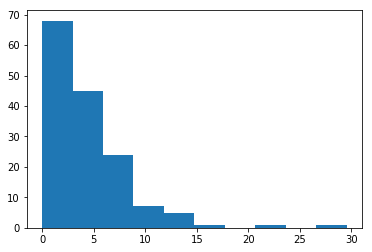

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(differences)
plt.show()

# Logistic Regression with MNIST

Now, we'll see how this regression model can perform on the MNIST dataset. Now, as you know, linear regression is a model that produces continuous values. Like we saw in the last example, the model predicted house prices which can take any real value. However, there are prediction tasks where we'd like the model to output a category or class. In the case of binary classification, you'd want the network to output the probabilities for the input being part of either class 1 or class 2.

This leads us to another type of regression called logistic regression. You can think of logistic regression as being the same thing as linear regression, except it outputs probabilities instead of real values. The way the model acheives this is by placing the output of (wx + b) through a softmax layer. 

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

numClasses = 10
inputSize = 784  
trainingIterations = 20000
batchSize = 64
tf.reset_default_graph() 

X = tf.placeholder(tf.float32, shape = [None, inputSize])
y = tf.placeholder(tf.float32, shape = [None, numClasses])

W1 = tf.Variable(tf.random_normal([inputSize, numClasses], stddev=0.1))
B1 = tf.Variable(tf.constant(0.1), [numClasses])

y_pred = tf.nn.softmax(tf.matmul(X, W1) + B1)

loss = tf.reduce_mean(tf.square(y - y_pred))
opt = tf.train.GradientDescentOptimizer(learning_rate = .05).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(trainingIterations):
    batch = mnist.train.next_batch(batchSize)
    batchInput = batch[0]
    batchLabels = batch[1]
    _, trainingLoss = sess.run([opt, loss], feed_dict={X: batchInput, y: batchLabels})
    if i%1000 == 0:
        train_accuracy = accuracy.eval(session=sess, feed_dict={X: batchInput, y: batchLabels})
        print ("step %d, training accuracy %g"%(i, train_accuracy))

batch = mnist.test.next_batch(batchSize)
testAccuracy = sess.run(accuracy, feed_dict={X: batch[0], y: batch[1]})
print ("test accuracy %g"%(testAccuracy))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.09375
step 1000, training accuracy 0.53125
step 2000, training accuracy 0.640625
step 3000, training accuracy 0.78125
step 4000, training accuracy 0.75
step 5000, training accuracy 0.75
step 6000, training accuracy 0.890625
step 7000, training accuracy 0.9375
step 8000, training accuracy 0.8125
step 9000, training accuracy 0.9375
step 10000, training accuracy 0.859375
step 11000, training accuracy 0.921875
step 12000, training accuracy 0.8125
step 13000, training accuracy 0.90625
step 14000, training accuracy 0.828125
step 15000, training accuracy 0.859375
step 16000, training accuracy 0.875
step 17000, training accuracy 0.921875
step 18000, training accuracy 0.875
step 19000, training accuracy 0.953125
test accuracy 0.9375
